# Problem stetement 1

In [1]:
# Prepare a prediction model for profit of 50_startups data.

# Do transformations for getting better predictions of profit and 
# make a table containing R^2 value for each prepared model.


# R&D Spend -- Research and devolop spend in the past few years

# Administration-- spend on administration in the past few years

# Marketing Spend-- spend on Marketing in the past few years

# State-- states from which data is collected

# Profit-- profit of each state in the past few years


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
startup=pd.read_csv("50_Startups.csv")

In [4]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
#checking for any missing value
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
#correlation matrix
corr=startup.corr()

In [9]:
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
startup.rename(columns={"R&D Spend":"R_and_D","Marketing Spend":"Marketing_Spend"},inplace=True)

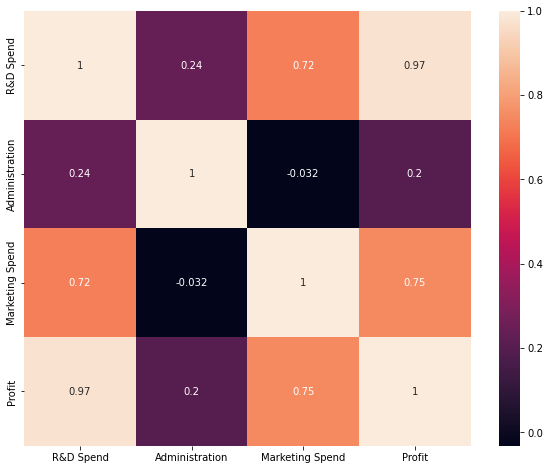

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,data=startup,annot=True)
plt.show()

In [12]:
startup.drop("State",axis=1,inplace=True)

In [13]:
startup.columns

Index(['R_and_D', 'Administration', 'Marketing_Spend', 'Profit'], dtype='object')

<Figure size 720x288 with 0 Axes>

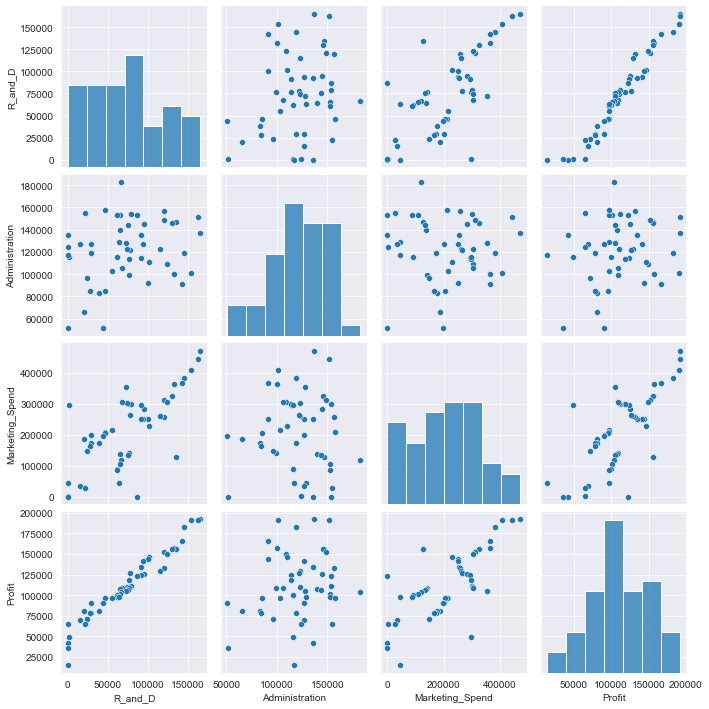

In [14]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid')
sns.pairplot(startup)
plt.show()

In [15]:
import statsmodels.formula.api as smf
#startup.columns
startup.head(5)

,R_and_D,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [16]:
model=smf.ols("Profit~R_and_D+Administration+Marketing_Spend",data=startup).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.53e-30
Time:                        23:06:14   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_and_D             0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#p>0.05 value of administration and marketing_spend is high.as we have check individually check

In [19]:
model_administration=smf.ols("Profit~Administration",data=startup).fit()

In [20]:
model_administration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 23 Mar 2022   Prob (F-statistic):              0.162
Time:                        23:06:14   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model_Marketing_Spend=smf.ols("Profit~Marketing_Spend",data=startup).fit()

In [22]:
model_Marketing_Spend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.38e-10
Time:                        23:06:15   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model_combine=smf.ols("Profit~Administration+Marketing_Spend",data=startup).fit()

In [24]:
model_combine.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           2.50e-10
Time:                        23:06:16   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [25]:
startup.columns

Index(['R_and_D', 'Administration', 'Marketing_Spend', 'Profit'], dtype='object')

In [26]:
rsq_R_and_D=smf.ols("R_and_D~Administration+Marketing_Spend",data=startup).fit().rsquared
vif_R_and_D=1/(1-rsq_R_and_D)
vif_R_and_D


2.4689030699947017

In [27]:
rsq_Administration=smf.ols("Administration~R_and_D+Marketing_Spend",data=startup).fit().rsquared
vif_Administration=1/(1-rsq_Administration)
vif_Administration


1.1750910070550455

In [28]:
rsq_Marketing_Spend=smf.ols("Marketing_Spend~R_and_D+Administration",data=startup).fit().rsquared
vif_Marketing_Spend=1/(1-rsq_Marketing_Spend)
vif_Marketing_Spend


2.326773290530878

In [29]:
dict1={"variable":['R_and_D', 'Administration', 'Marketing_Spend'],
      "vif_value":[vif_R_and_D,vif_Administration,vif_Marketing_Spend]}

In [30]:
dict1

{'variable': ['R_and_D', 'Administration', 'Marketing_Spend'],
 'vif_value': [2.4689030699947017, 1.1750910070550455, 2.326773290530878]}

In [31]:
vif=pd.DataFrame(dict1)

In [32]:
vif

,variable,vif_value
0,R_and_D,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

C:\Users\lax\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


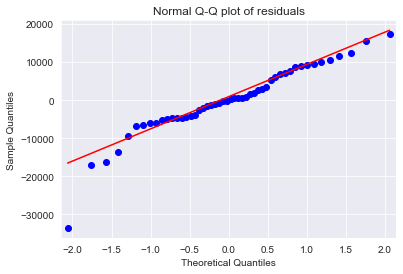

In [33]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [34]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

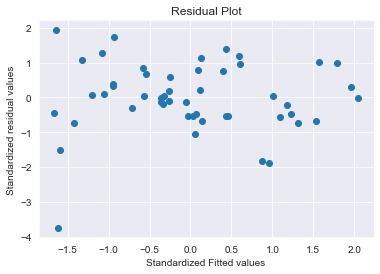

In [35]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors


In [36]:
startup.columns

Index(['R_and_D', 'Administration', 'Marketing_Spend', 'Profit'], dtype='object')

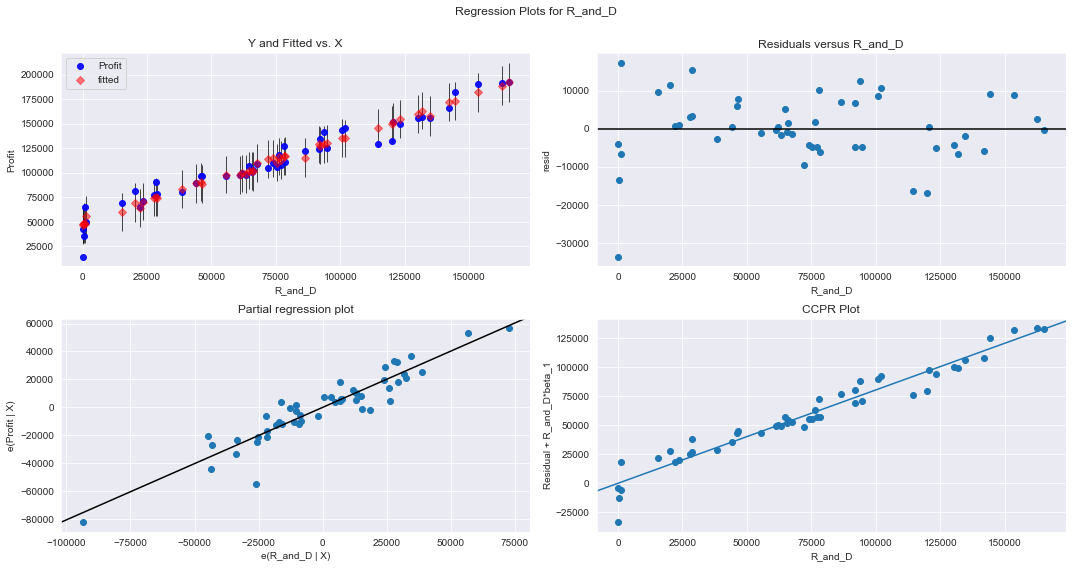

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "R_and_D", fig=fig)
plt.show()

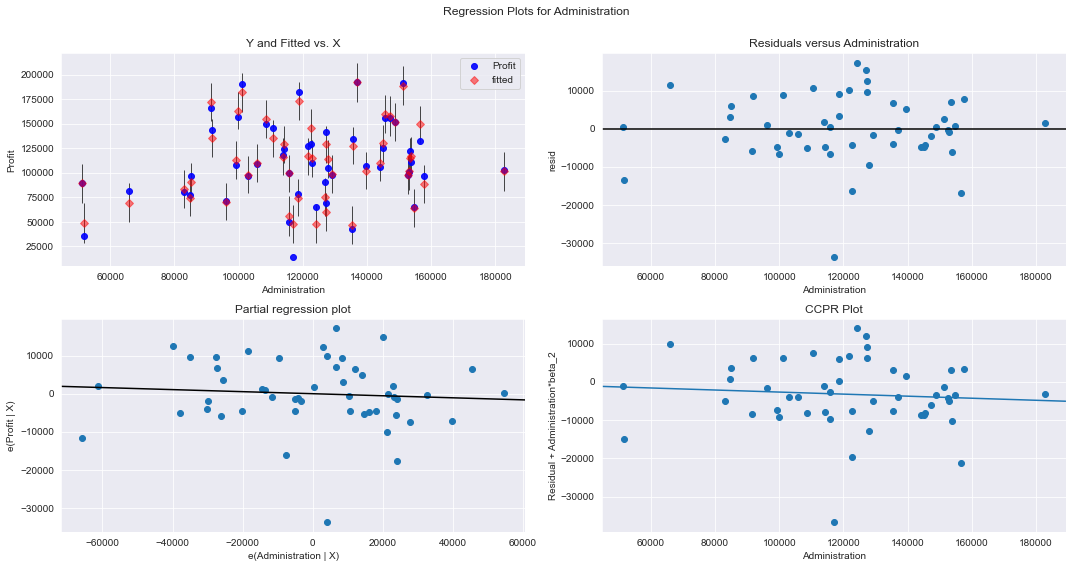

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

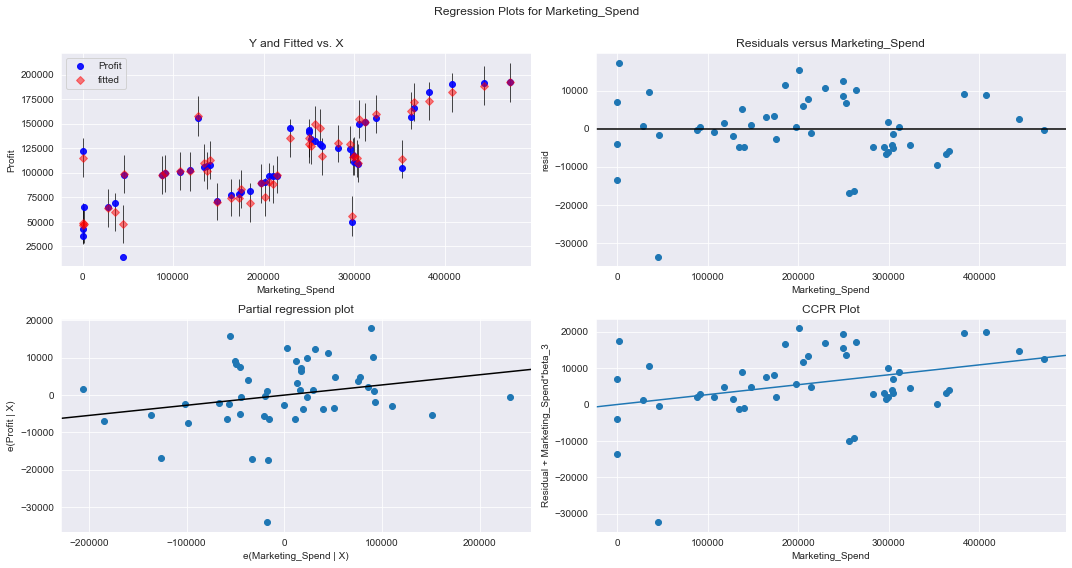

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

In [40]:
## Cook’s Distance

In [41]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

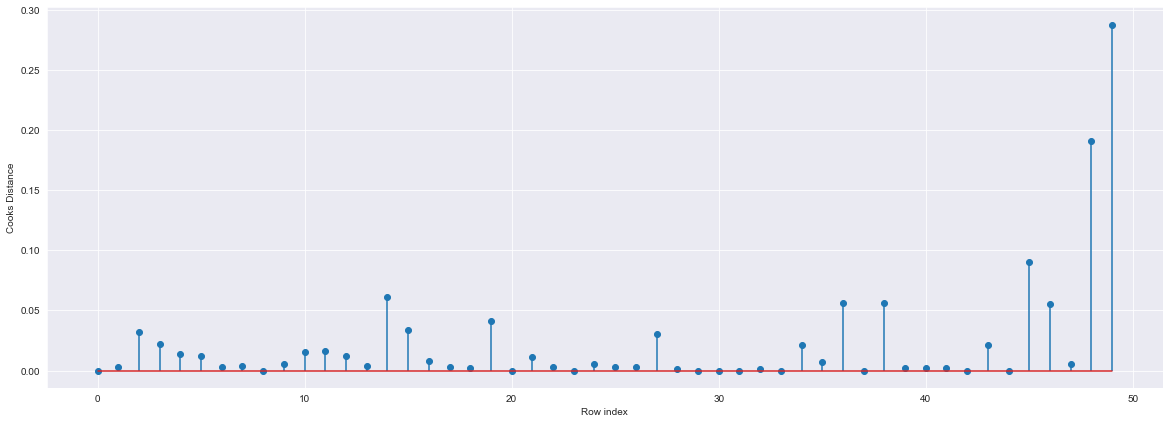

In [42]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543264)

# High Influence points

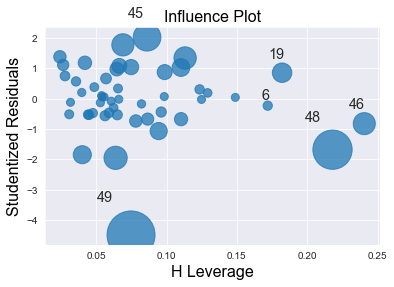

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [45]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

# From the above plot, it is evident that data point there are the no influencers found

In [46]:
model_Administration=smf.ols("Profit~R_and_D+Marketing_Spend",data=startup).fit()
(model_Administration.rsquared,model_Administration.aic)

(0.9504503015559763, 1057.070772191826)

In [47]:
model_Marketing_Spend=smf.ols("Profit~R_and_D+Administration",data=startup).fit()
(model_Marketing_Spend.rsquared,model_Marketing_Spend.aic)

(0.9478129385009173, 1059.6636934567293)

# form the above conclution from R-squared: 0.950 and AIC value(1057) is less in model_Administration and we remove multicolinearity

# Cooks Distance

In [48]:
model_influence=model_Administration.get_influence()
(c,_)=model_influence.cooks_distance

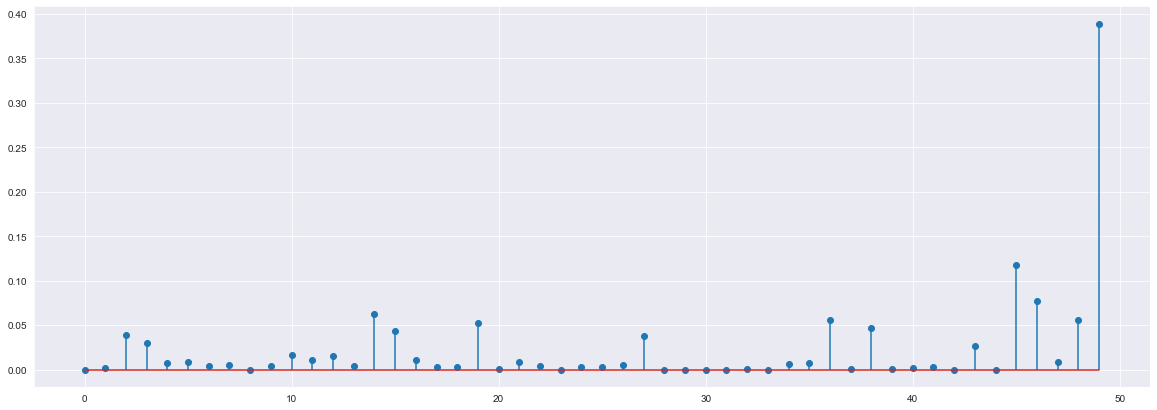

In [49]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.show()

# Since the value is <1 , we can stop the diagnostic process and finalize the model

In [50]:
startup.columns

Index(['R_and_D', 'Administration', 'Marketing_Spend', 'Profit'], dtype='object')

# Predicting for new data

In [51]:
#New data for prediction
new_data=pd.DataFrame({'R_and_D':165349.20,"Administration":136897.80,"Marketing_Spend":471784.10},index=[1])

In [52]:
model_Administration.predict(new_data)

1    192800.458625
dtype: float64

In [53]:
startup.head()

,R_and_D,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
